In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import boxcox # на всякий случай, ничего не дало его применение
#pip install category_encoders

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
data_train = pd.read_csv(path_train)
data_train = data_train.drop_duplicates()
data_train

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864
...,...,...,...,...,...,...,...,...,...,...,...,...
67593,0.30,D,SI2,Very Good,Very Good,Excellent,64.4,55.0,4.19,4.21,2.71,640
67594,0.60,H,VS2,Excellent,Excellent,Excellent,62.4,59.0,5.40,5.42,3.38,2932
67595,0.36,L,VVS2,Excellent,Excellent,Excellent,62.3,55.0,4.55,4.59,2.85,788
67596,0.41,J,SI1,Excellent,Excellent,Excellent,62.7,57.0,4.74,4.78,2.98,1074


In [8]:
indices = data_train[data_train['meas_depth'] > data_train['meas_length']].index
data_train.loc[indices, ['meas_length', 'meas_depth']] = data_train.loc[indices, ['meas_depth', 'meas_length']].values

In [9]:
for column in data_train.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_train[column].quantile(0.25)
    Q3 = data_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_train = data_train[(data_train[column] >= lower_bound) & (data_train[column] <= upper_bound)]
data_train

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864
...,...,...,...,...,...,...,...,...,...,...,...,...
67593,0.30,D,SI2,Very Good,Very Good,Excellent,64.4,55.0,4.19,4.21,2.71,640
67594,0.60,H,VS2,Excellent,Excellent,Excellent,62.4,59.0,5.40,5.42,3.38,2932
67595,0.36,L,VVS2,Excellent,Excellent,Excellent,62.3,55.0,4.55,4.59,2.85,788
67596,0.41,J,SI1,Excellent,Excellent,Excellent,62.7,57.0,4.74,4.78,2.98,1074


In [10]:
cat_features = ['cut', 'color', 'symmetry', 'polish']
axis_features = ['meas_length', 'meas_width', 'meas_depth']
num_features = ['size', 'depth_percent', 'table_percent']

In [11]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)), 
    ('polynom', PolynomialFeatures(2, include_bias=False)),
    ('scaler', StandardScaler())
])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('scaler', StandardScaler())
])

clarity_map = [{
    'col': 'clarity',
    'mapping': {'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
}]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy='most_frequent')),
    ('ce', ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
])

CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        ("cat", OneHotEncoder(sparse_output=False).set_output(transform="pandas"), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])
    ]).set_output(transform='pandas')

display(CT)


ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['meas_length', 'meas_width', 'meas_depth']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0)),
                                                 ('scaler'...
                                 ['size', 'depth_percent', 'table_percent']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['cut', 'color', 'symmetry', 'polish']),
                                ('ordinal_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

In [12]:
model_pipe = Pipeline([
    ('model', TransformedTargetRegressor(
        regressor=Pipeline(steps=[
            ('preproc', CT),
            ('estimator', KNeighborsRegressor(n_neighbors=5, p=3, weights='uniform'))
        ]),
        transformer=PowerTransformer(),
        check_inverse=False)
    )])


In [13]:
pred = model_pipe.fit(data_train.drop(['total_sales_price'], axis=1), data_train['total_sales_price']); # фичу модель на тренировочных данных

/Users/imachome/anaconda3/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/imachome/anaconda3/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/Users/imachome/anaconda3/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)


In [14]:
pred

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=20,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('polynom',
                                                                                                                         PolynomialFeatures(include_bias=False)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['meas_length',
                                                                                                         'meas_width',
                                                                                                         '...
                                                                                                         'polish']),
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       KNeighborsRegressor(p=3))]),
                                            transformer=PowerTransformer()))])

In [15]:
data_test = pd.read_csv(path_test)
data_test

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.53,E,SI2,Excellent,Excellent,Excellent,62.6,56.0,5.15,5.18,3.24
1,0.31,I,VVS1,Excellent,Excellent,Excellent,61.9,59.0,4.32,4.34,2.68
2,0.52,J,SI1,Excellent,Excellent,Excellent,62.7,56.0,5.15,5.18,3.24
3,0.50,K,VVS2,Very Good,Very Good,Very Good,64.3,58.0,4.92,4.97,3.18
4,0.30,K,VVS1,Excellent,Excellent,Excellent,62.8,57.0,4.26,4.28,2.69
...,...,...,...,...,...,...,...,...,...,...,...
22448,0.31,E,VVS1,Excellent,Excellent,Excellent,61.6,59.0,4.34,4.36,2.68
22449,0.50,H,VS1,Excellent,Excellent,Excellent,62.4,56.0,5.05,5.09,3.16
22450,0.31,F,IF,Excellent,Excellent,Excellent,62.4,57.0,4.34,4.36,2.71
22451,0.50,E,VS2,Excellent,Very Good,Excellent,63.0,57.0,5.00,5.07,3.17


In [16]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = pred.predict(data_test)
y_predict

/Users/imachome/anaconda3/lib/python3.11/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)


array([2799.30848233,  925.16552014, 1747.01720701, ..., 1180.03733241,
       2842.72332912, 1357.26501716])

(22453,) (22453,)
Отрицательные цены -  0
Max Error: 16,653
 
----------------------
   MAPE Error: 18.68
----------------------


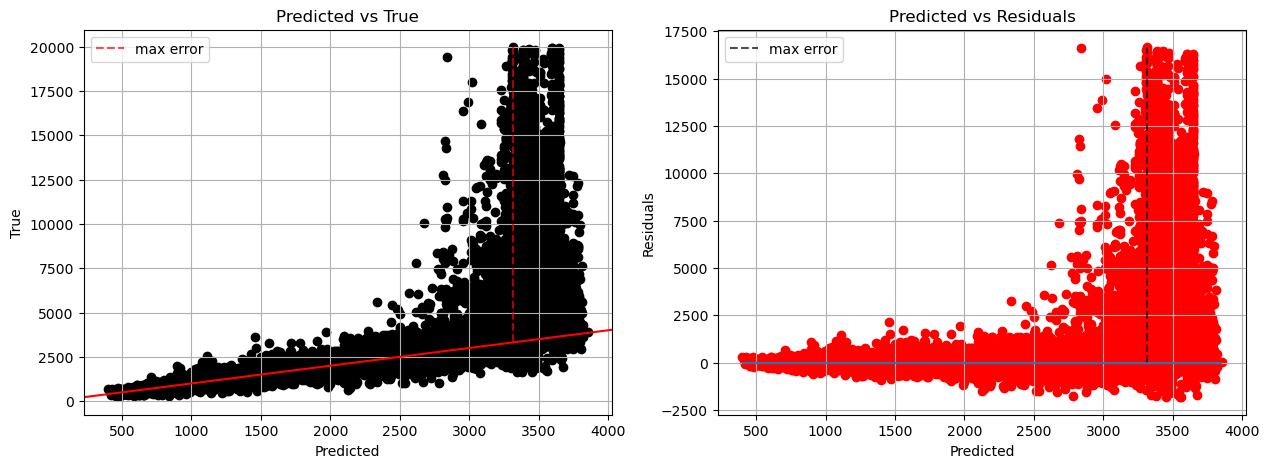

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)